First let's simulate fast spining top

The condition is that $I_3{\omega_3}^2 >> 4Mgl$ and $I_1$~$I_3$

this also means that $a^2>>\beta$

First import all the necessary packages

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import symmetric_top as sy
import euler_omega as eo
from numpy import linalg as la
from scipy.integrate import odeint

Next define initial conditions

In [9]:
cond = np.array([[1.0, np.pi/6.0, 1.0, 1.0], #slower top
                 [1.0, np.pi/6.0, 2.0, 1.0], #fast top
                 [1.0, np.pi/6.0, 3.0, 1.0], #faster top
                 [1.0, np.pi/6.0, 4.0, 1.0],
                 [1.0, np.pi/6.0, 5.0, 1.0],
                 [1.0, np.pi/6.0, 6.0, 1.0]])# much faster top, the value of d_psi_0 increased each time and i_rat is set to 1

val=np.zeros((6,2)) #an array to store values

Next find the period using the class and approximation

In [10]:
for ind in range(0,6):
    
    beta    = cond[ind,0]
    theta_0 = cond[ind,1]
    d_psi_0 = cond[ind,2]
    i_rat   = cond[ind,3]
    
    alpha = beta*np.cos(theta_0)
    a = i_rat*d_psi_0
    b = a*np.cos(theta_0)
      
    st = sy.SymTopIniCond(alpha, beta, a, b, i_rat)
    
    val[ind,0]=2*st.t_half
    val[ind,1]=np.pi*2/d_psi_0
    
    print('The period is', 2*st.t_half)
    print('The period using approximation',np.pi*2/d_psi_0)
    print('The precession frequency',beta/(2*a))
    print('------------------------------------------------')

Motion confined between  0.523598775597  and  1.69074055609
Half period is 4.036413861363564
The period is 8.072827722727128
The period using approximation 6.28318530718
The precession frequency 0.5
------------------------------------------------
Motion confined between  0.523598775598  and  0.706426549056
Half period is 2.0171892362970265
The period is 4.034378472594053
The period using approximation 3.14159265359
The precession frequency 0.25
------------------------------------------------
Motion confined between  0.523598775598  and  0.588473351237
Half period is 1.1612224803441
The period is 2.3224449606882
The period using approximation 2.09439510239
The precession frequency 0.166666666667
------------------------------------------------
Motion confined between  0.523598775598  and  0.557604605726
Half period is 0.8309406042756432
The period is 1.6618812085512864
The period using approximation 1.57079632679
The precession frequency 0.125
-----------------------------------------

With increase in $\omega_3$ the period values getting closer and the precession values getting lower.

The nutation period is given by the approximation

$T_n=\frac{2\pi I}{I_3\omega_3}$ if $I$ is almost eqaul to $I_3$

$T_n=\frac{2\pi }{\omega_3}$ and precession frequency is given by

$\dot\psi=\frac{\beta}{2a}=\frac{Mgl}{I_3\omega_3}$

Let's plot the error between actual and approximated values

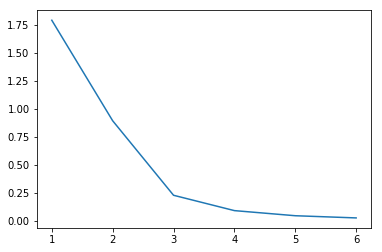

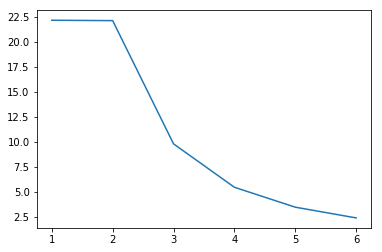

[array([[ 8.07282772,  6.28318531],
       [ 4.03437847,  3.14159265],
       [ 2.32244496,  2.0943951 ],
       [ 1.66188121,  1.57079633],
       [ 1.30211858,  1.25663706],
       [ 1.07316498,  1.04719755]])]


In [11]:
t = [1,2,3,4,5,6]
plt.plot(t,(val[:,0]-val[:,1])) # diference between period values
plt.show()

plt.plot(t,(val[:,0]-val[:,1])*100/val[:,0])  #precentge error
plt.show()


print([val])

The graph suggests that with increase in $\omega_3$ the error (difference) between actual and approximated values getting lower.

For sufficiently large $\omega_3$ the approximation is valid